In [4]:
#full link: https://medium.com/analytics-vidhya/predict-employee-attrition-a34e2c5a972d

#Problem:Uncover the factors that lead to employee attrition and explore important questions such as ‘show me a breakdown of distance from home by job role and attrition’ or ‘compare average monthly income by education and attrition’. 
#This is a fictional data set created by IBM data scientists.

#Education
#1.Below College, 2.College 3.Bachelor, 4.Master, 5.Doctor

#EnvironmentSatisfaction
#1.Low, 2.Medium, 3.High, 4.Very High

#JobInvolvement
#1.Low, 2,Medium, 3.High, 4.Very High

#JobSatisfaction
#1.Low, 2.Medium, 3.High, 4.Very High

#PerformanceRating
#1.Low, 2.Good, 3.Excellent, 4.Outstanding'

#RelationshipSatisfaction
#1.Low, 2.Medium, 3.High, 4.Very High

#WorkLifeBalance
#1.Bad, 2.Good, 3.Better, 4.Best


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
ibm = pd.read_csv('IBM_HR-Employee-Attrition.csv')

In [7]:
ibm.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [8]:
ibm.shape

(1470, 35)

In [9]:
ibm.isnull()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


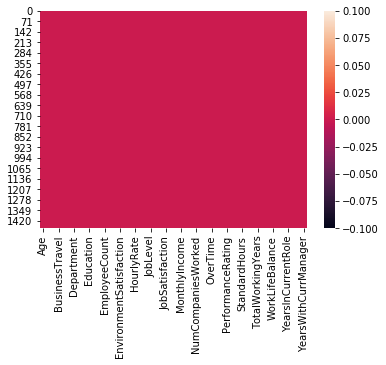

In [10]:
sns.heatmap(ibm.isnull())

In [11]:
ibm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [12]:
ibm.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [13]:
ibm.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [14]:
ibm['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [15]:
#**Numerical variables**
# - **Age:** Age of employee
# - **DailyRate:** Per day salary of employee
# - **DistanceFromHome:** In kms distance 
# - **Education:** 
#         1 'Below College'
#         2 'College'
#         3 'Bachelor'
#         4 'Master'
#         5 'Doctor'
# - **EnvironmentSatisfaction:** 
#         1 'Low'
#         2 'Medium'
#         3 'High'
#         4 'Very High'
# - **HourlyRate:** 
# - **JobInvolvement:**
#     1 'Low'
#     2 'Medium'
#     3 'High'
#     4 'Very High'
# -**JobLevel:**
# -**RelationshipSatisfaction:**
# -**TotalWorkingYears:**
# -**WorkLifeBalance:**
#     1 'Bad'
#     2 'Good'
#     3 'Better'
#     4 'Best'
# -**YearsAtCompany:**
# -**YearsInCurrentRole:**
# -**YearsSinceLastPromotion:**
# -**YearsWithCurrManager:**

In [16]:
numerical = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','RelationshipSatisfaction','TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [17]:
#Print all of the object data types and their unique values
for column in ibm.columns:
    if ibm[column].dtype == object:
        print(str(column) + ' : ' + str(ibm[column].unique()))
        print(ibm[column].value_counts())
        print("_________________________________________________________________")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
_________________________________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
_________________________________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
_________________________________________________________________
Gender 

In [18]:
categorical= ['OverTime','MaritalStatus','JobRole','Gender','EducationField','Department','BusinessTravel','Attrition']

In [19]:
ibm= ibm[numerical + categorical]

In [20]:
ibm

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,RelationshipSatisfaction,TotalWorkingYears,...,YearsSinceLastPromotion,YearsWithCurrManager,OverTime,MaritalStatus,JobRole,Gender,EducationField,Department,BusinessTravel,Attrition
0,41,1102,1,2,2,94,3,2,1,8,...,0,5,Yes,Single,Sales Executive,Female,Life Sciences,Sales,Travel_Rarely,Yes
1,49,279,8,1,3,61,2,2,4,10,...,1,7,No,Married,Research Scientist,Male,Life Sciences,Research & Development,Travel_Frequently,No
2,37,1373,2,2,4,92,2,1,2,7,...,0,0,Yes,Single,Laboratory Technician,Male,Other,Research & Development,Travel_Rarely,Yes
3,33,1392,3,4,4,56,3,1,3,8,...,3,0,Yes,Married,Research Scientist,Female,Life Sciences,Research & Development,Travel_Frequently,No
4,27,591,2,1,1,40,3,1,4,6,...,2,2,No,Married,Laboratory Technician,Male,Medical,Research & Development,Travel_Rarely,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,3,17,...,0,3,No,Married,Laboratory Technician,Male,Medical,Research & Development,Travel_Frequently,No
1466,39,613,6,1,4,42,2,3,1,9,...,1,7,No,Married,Healthcare Representative,Male,Medical,Research & Development,Travel_Rarely,No
1467,27,155,4,3,2,87,4,2,2,6,...,0,3,Yes,Married,Manufacturing Director,Male,Life Sciences,Research & Development,Travel_Rarely,No
1468,49,1023,2,3,4,63,2,2,4,17,...,0,8,No,Married,Sales Executive,Male,Medical,Sales,Travel_Frequently,No


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271E0514248>]],
      dtype=object)

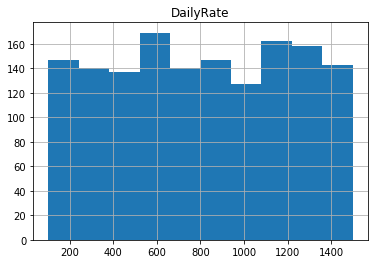

In [21]:
ibm.hist('DailyRate')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000271E05E4D08>,
      dtype=object)

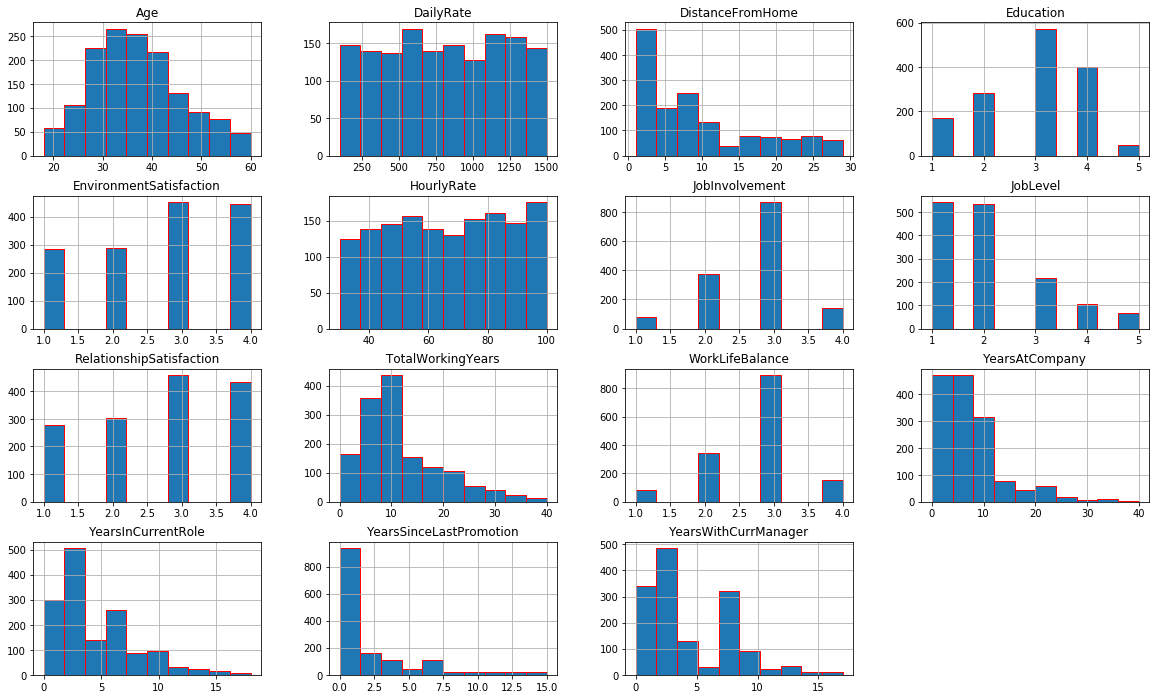

In [22]:
ibm[numerical].hist(edgecolor='Red', bins=10, figsize=(20,12))

In [23]:
#Conclusi0ns from Above:


#Age: most of the employees working for IBM are between 30 to 40 years age group
#Daily Rate: most of the emploees are paid between range 500 to 650
#Distance: maximum no. of emoployees reside With In 10km radius to the ofc
#Education: majority of the employees have just bachelor degree
#Job involvement: most of the employeed are very highly involved in their work
#Job level: most if the employees fall under job category of 1 & 2
#majority of tyears of Exp: he employees have 10 or more years of experience
#environlmental satisfaction: Majority of the emolpoyees are very satisfied with the work environment


No     1054
Yes     416
Name: OverTime, dtype: int64
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
Male      882
Female    588
Name: Gender, dtype: int64
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
No     1233
Yes     237
Name: Attrition, dtype: int64


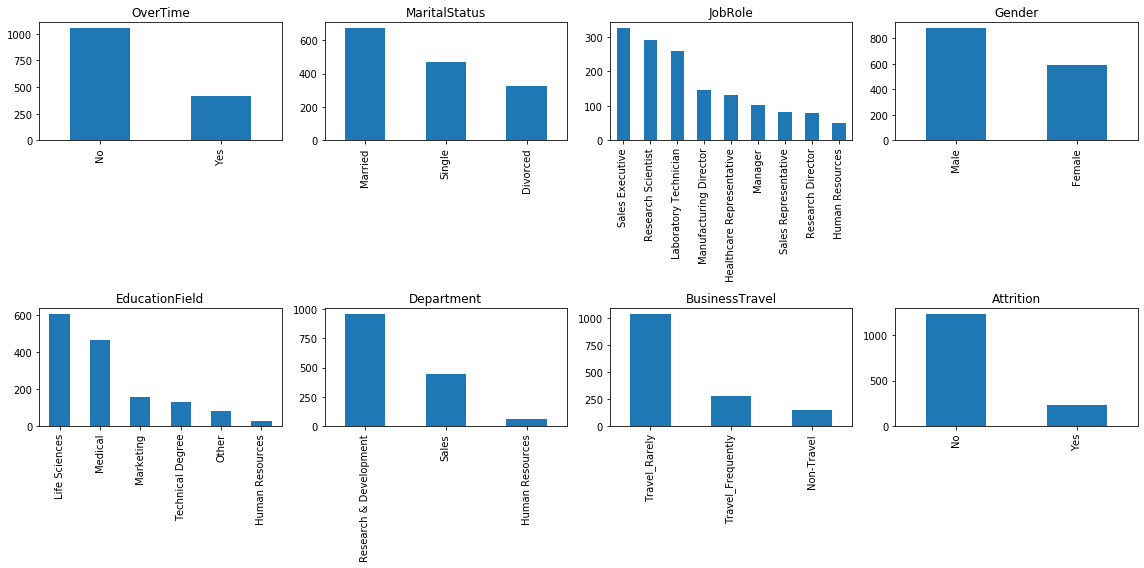

In [24]:
fig, ax = plt.subplots(2,4, figsize=(16,8))
for i, j in zip(categorical, ax.flatten()):
    print(ibm[i].value_counts())
    ibm[i].value_counts().plot(kind='bar', ax=j, title=i)


fig.tight_layout()

In [25]:
#Understanding the main Variable

ibm['Attrition'].value_counts()


No     1233
Yes     237
Name: Attrition, dtype: int64

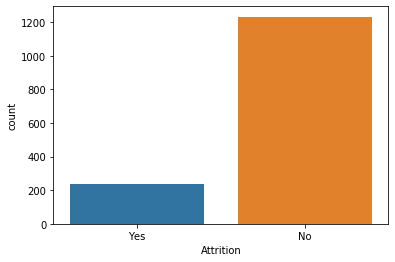

In [28]:
sns.countplot(ibm['Attrition'])


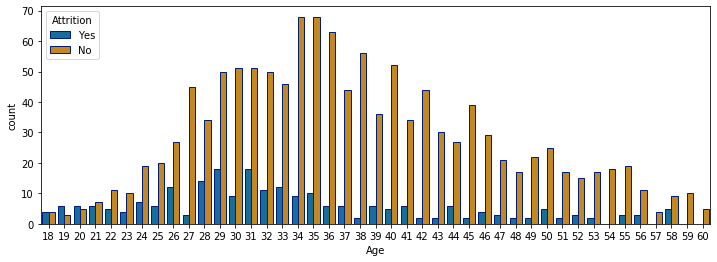

In [30]:
#Showing the number of employees that left and stayed by age

fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition', data = ibm, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

In [ ]:
#Removing unneeded features

#Remove the column EmployeeNumber
ibm = ibm.drop('EmployeeNumber', axis = 1) # A number assignment 

#Remove the column StandardHours
ibm = ibm.drop('StandardHours', axis = 1) #Contains only value 80

#Remove the column EmployeeCount
ibm = ibm.drop('EmployeeCount', axis = 1) #Contains only the value 1 

#Remove the column EmployeeCount
ibm = ibm.drop('Over18', axis = 1) #Contains only the value 'Yes'